In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
def clean_traffic(value):
    value = value.replace(",", "").replace("+", "").strip()
    return int(value)

clusters = ['Economy','Technology and Science', 'Entertainment','Lifestyle','Accident','Geopolitical','Intellectualism']
countries = {'africa':['Kenya','Nigeria','SouthAfrica'],
            'europe':['Denmark','UK','Finland'],
            'north_america_australia':['Australia','Canada','USA'],
            'west_asia':['Malaysia','Philippines','Singapore']}
regions = ['africa','europe','north_america_australia','west_asia']
region = regions[2]
specific_category = clusters[6]
# country = countries['west_asia'][2]
country = countries['africa'][0]
# country = countries['west_asia'][2]
# country = countries['europe'][2]


#--------detailed labels--------#
# path = f'./output/regions/west_asia/classified_data/classified_data/{country}_classification_output.csv'
# path = f'./output/regions/africa/classified_data/classified_data/{country}_classification_output.csv'
# path = f'./output/regions/north_america_australia/classified_data/{country}_classification_output.csv'
# path = f'./output/regions/europe/classified_data/classified_data/{country}_classification_output.csv'
path = f'./output/regions/{region}/classified_data/{country}_classification_output.csv'

#--------general labels--------#
# path = f"./output/regions/north_america_australia/clustered_classified_data/{country}_clustered_classified.csv"
# path = f'./output/regions/europe/clustered_classified_data/{country}_clustered_classified.csv'
# path = f'./output/regions/north_america_australia/clustered_classified_data/real_data/{country}_clustered_classified.csv'
# path = f'./output/regions/west_asia/clustered_classified_data/{country}_clustered_classified.csv'


data = pd.read_csv(path)


df = data[['date','predicted_label','traffic','general_label']]
df['traffic_numeric'] = df['traffic'].apply(clean_traffic)

topic_stats = df.groupby('general_label')['traffic_numeric'].agg(['mean']).sort_values('mean',ascending=True)
topic_stats

FileNotFoundError: [Errno 2] No such file or directory: './output/regions/north_america_australia/classified_data/Kenya_classification_output.csv'

In [ ]:
# topic_stats.plot(kind='bar', color='skyblue')

In [ ]:
# df

C:\Users\alkrd\AppData\Local\Temp\ipykernel_3384\1617459004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


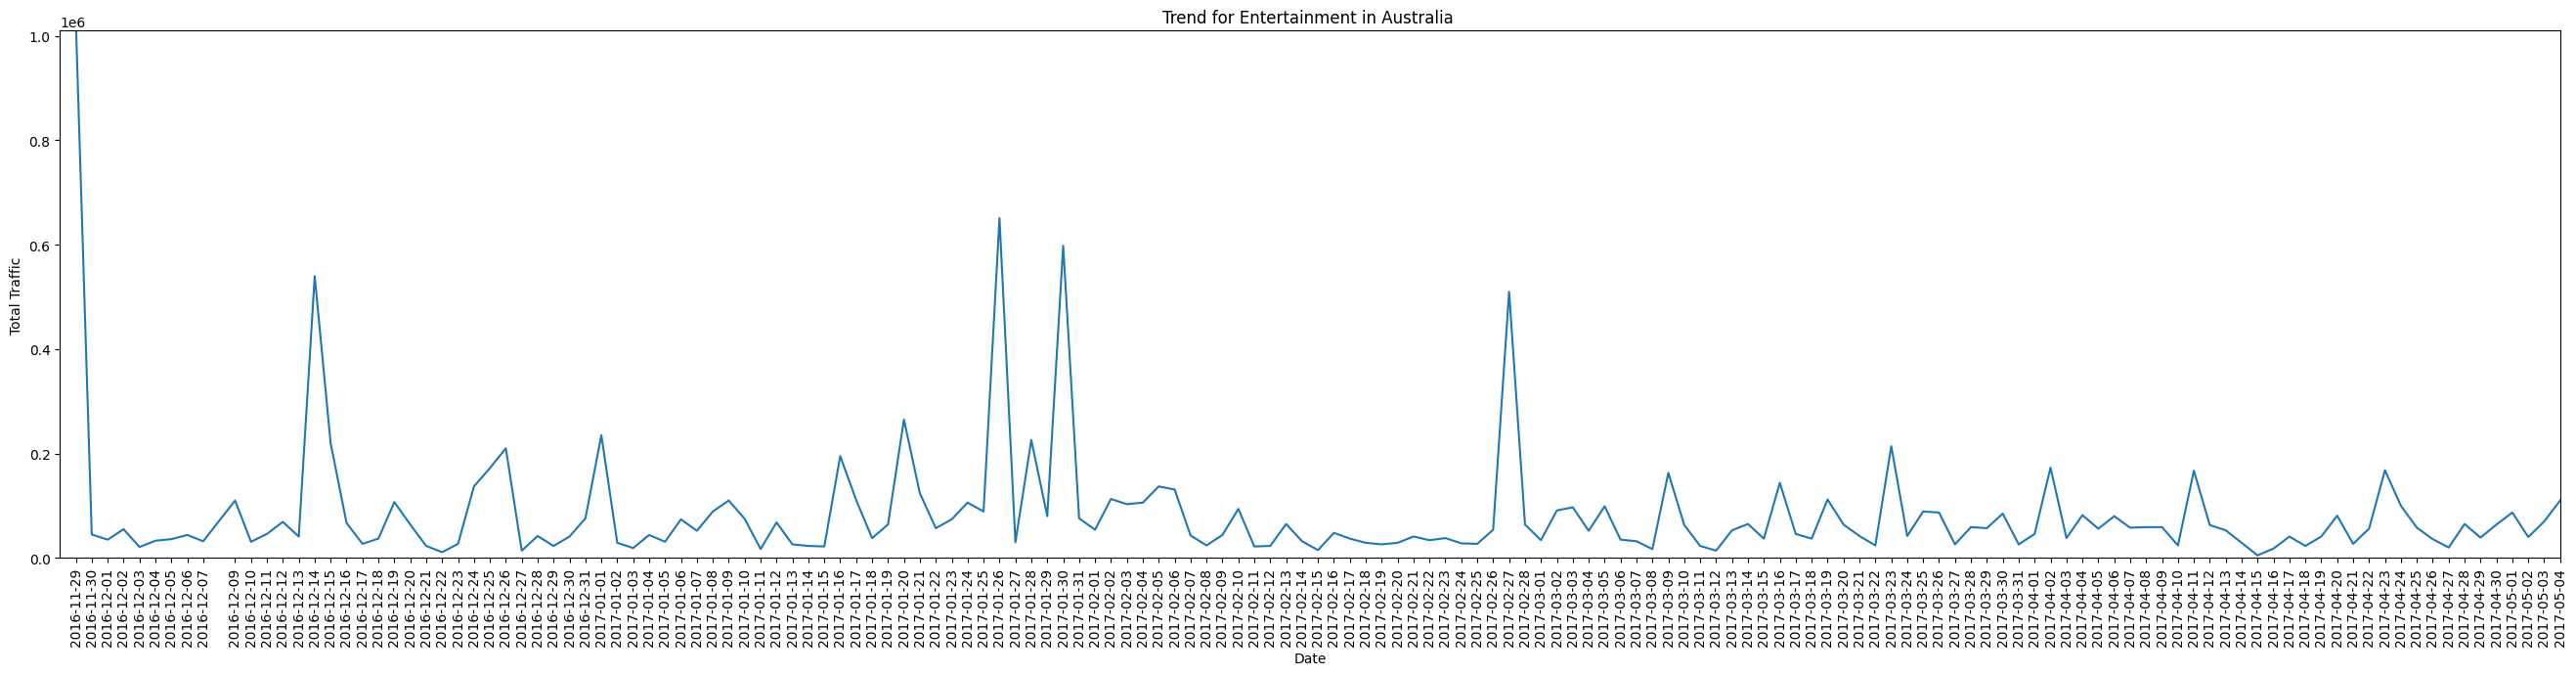

In [ ]:
df['date'] = pd.to_datetime(df['date'])
maxTraffic = df['traffic_numeric'].max()

category_time_distribution = df.groupby(['date', 'general_label'])['traffic_numeric'].sum().reset_index(name='total_traffic')
specific_category_data = category_time_distribution[category_time_distribution['general_label'] == specific_category]

plt.figure(figsize=(33, 7))
sns.lineplot(data=specific_category_data, x='date', y='total_traffic')
plt.title(f"Trend for {specific_category} in {country} ")
plt.xlabel("Date")
plt.ylabel("Total Traffic")
plt.xticks(specific_category_data['date'], rotation=90)

plt.ylim(0, maxTraffic+10000)

start_date = pd.to_datetime('2016-11-28')
end_date = pd.to_datetime('2017-05-04')

plt.xlim(start_date, end_date)

plt.show()

In [ ]:
df

,date,predicted_label,traffic,general_label,traffic_numeric
0,2016-11-29,media and entertainment,"2,000+",Entertainment,2000
1,2016-11-29,celebrity,"5,000+",Entertainment,5000
2,2016-11-29,tragedy,"20,000+",Accident,20000
3,2016-11-29,crime,"2,000+",Accident,2000
4,2016-11-29,media and entertainment,"10,000+",Entertainment,10000
...,...,...,...,...,...
2412,2017-05-04,technology,"5,000+",Technology and Science,5000
2413,2017-05-04,politics,"10,000+",Geopolitical,10000
2414,2017-05-04,environment,"5,000+",Lifestyle,5000
2415,2017-05-04,technology,"10,000+",Technology and Science,10000


In [ ]:
category_time_distribution

,date,general_label,total_traffic
0,2016-11-29,Accident,29000
1,2016-11-29,Entertainment,1029000
2,2016-11-29,Intellectualism,10000
3,2016-11-29,Lifestyle,10000
4,2016-11-30,Accident,7000
...,...,...,...
699,2017-05-04,Entertainment,110000
700,2017-05-04,Geopolitical,15000
701,2017-05-04,Intellectualism,505000
702,2017-05-04,Lifestyle,120000


In [ ]:
specific_category_data

,date,general_label,total_traffic
1,2016-11-29,Entertainment,1029000
5,2016-11-30,Entertainment,45000
10,2016-12-01,Entertainment,35000
15,2016-12-02,Entertainment,55000
17,2016-12-03,Entertainment,21000
...,...,...,...
681,2017-04-30,Entertainment,64000
685,2017-05-01,Entertainment,87000
691,2017-05-02,Entertainment,40000
695,2017-05-03,Entertainment,70000
